# **<font style = "color:rgb(58, 45, 247)">Data Visualization and Feature Engineering </font>**
Continue from data processing, this notebook will conduct:
* Data Visualization
* Feature Engineering
* Data Splitting

You can try seeing the output from this notebook or you also create all output dataset with full script in `feature_engineering.py`

In [1]:
"""
Uncomment this cell to run `feature_engineering.py` from this notebook.
Please note it will create a new folders with process datasets
"""
# import subprocess
# import sys
# # Run the script and capture output in the notebook
# feature_engineer_result = subprocess.run(
#     [sys.executable, 'feature_engineering.py'],
#     stdout=subprocess.PIPE,
#     stderr=subprocess.PIPE,
#     text=True
# )
# 
# # Print both stdout and stderr
# print(feature_engineer_result.stdout)
# print(feature_engineer_result.stderr)

'\nUncomment this cell to run `feature_engineering.py` from this notebook.\nPlease note it will create a new folders with process datasets\n'

In [2]:
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd
from pandas.core.interchange.dataframe_protocol import DataFrame

from data_path import COMBINED_FILE_PATH

##  **<font style = "color:rgb(58, 45, 247)"> Loading Data </font>**

In [3]:
walking_data_path = COMBINED_FILE_PATH + "/walking.csv"
reading_data_path = COMBINED_FILE_PATH + "/reading.csv"
playing_data_path = COMBINED_FILE_PATH + "/playing.csv"

# Read the 3 filee
raw_walking_data = pd.read_csv(walking_data_path)
raw_reading_data = pd.read_csv(reading_data_path)
raw_playing_data = pd.read_csv(playing_data_path)

# Make copies for feature engineering
walking_data = raw_walking_data.copy()
reading_data = raw_reading_data.copy()
playing_data = raw_playing_data.copy()

In [4]:
walking_data.head()

,Timestamp,Gazepoint X,Gazepoint Y,Pupil area (right) sq mm,Pupil area (left) sq mm,Eye event,Result
0,1,0.5502,0.3150,0.18,0.0,S,1
1,1,0.5480,0.2929,0.18,0.0,FB,1
2,1,0.5473,0.2965,0.18,0.0,NA,1
3,1,0.5477,0.2965,0.17,0.0,NA,1
4,1,0.5737,0.3835,0.19,0.0,S,1


In [5]:
reading_data.head()

,Timestamp,Gazepoint X,Gazepoint Y,Pupil area (right) sq mm,Pupil area (left) sq mm,Eye event,Result
0,1,0.3992,0.8388,0.52,0.42,FB,2
1,1,0.4026,0.8242,0.72,0.57,NA,2
2,1,0.4547,0.7780,0.64,0.55,S,2
3,1,0.4586,0.7392,0.83,0.63,S,2
4,1,0.5456,0.7639,0.62,0.72,S,2


In [6]:
playing_data.head()

,Timestamp,Gazepoint X,Gazepoint Y,Pupil area (right) sq mm,Pupil area (left) sq mm,Eye event,Result
0,1,0.4784,0.4913,0.41,0.44,NA,3
1,1,0.4841,0.5100,0.41,0.44,FEx0.474y0.482d0.183,3
2,1,0.4018,0.5011,0.42,0.42,S,3
3,1,0.3985,0.4477,0.43,0.45,S,3
4,1,0.4067,0.4727,0.43,0.45,S,3


## **<font style = "color:rgb(58, 45, 247)"> Feature Engineering </font>**
In the SeeTrue's glass, eye events are detected and coded as follows:

| Event name           | Description                                                                                                                                                                         |
|:---------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| S                    | When either eyes is making a saccade - the series of small, jerky movements of the eyes when changing focus from one point to another.                                              |
| FB                   | Fixation Begin - when both eyes start a fixation (first sample within a fixation)                                                                                                   |
| FEx0.474y0.482d0.183 | Fixation End, where: x0.474 is the average x coordinate during the fixation; y0.482 is average y coordinate during the fixation; d0.183 is the duration of the fixation, in seconds |
| BB                   | Blink Begin - when a blink start for either eye                                                                                                                                     |
|BE| Blink End - when a blink stops                                                                                                                                                      |
|NA|When either eye is not visible / features are not detected properly|

Based on these classification, for this phase, we will:
* Remove all NA columns
* Separate FE fixation values to unify classification values


In [7]:
walking_data[' Eye event ']

0          S 
1         FB 
2         NA 
3         NA 
4          S 
         ... 
51277      S 
51278      S 
51279      S 
51280      S 
51281      S 
Name:  Eye event , Length: 51282, dtype: object

In [8]:
# Function
def remove_na_row(dataframe_data):
    # Drop the row where 'Eye event' column has 'NA' values
    original_count = len(dataframe_data)
    dataframe_data = dataframe_data[dataframe_data[' Eye event '] != ' NA ']
    # Count the remaining rows
    filtered_count = len(dataframe_data)
    
    # Saved the filtered DataFrame and log the number of row removed
    removed_rows = original_count - filtered_count
    print(f"{removed_rows} rows with ' NA ' in 'Eye event' removed from {dataframe_data} DataFrame")
    return dataframe_data
        

In [9]:
no_na_walking_data = remove_na_row(walking_data)

10256 rows with ' NA ' in 'Eye event' removed from         Timestamp    Gazepoint X    Gazepoint Y    Pupil area (right) sq mm   \
0                1         0.5502         0.3150                        0.18   
1                1         0.5480         0.2929                        0.18   
4                1         0.5737         0.3835                        0.19   
5                1         0.5721         0.3731                        0.17   
6                1         0.5992         0.3432                        0.17   
...            ...            ...            ...                         ...   
51277            9         0.6496         0.5243                        0.51   
51278            9         0.6597         0.4851                        0.47   
51279            9         0.6948         0.4380                        0.48   
51280            9         0.5629         0.3968                        0.55   
51281            9         0.4722         0.3563                     

In [10]:
no_na_reading_data = remove_na_row(reading_data)

29442 rows with ' NA ' in 'Eye event' removed from         Timestamp    Gazepoint X    Gazepoint Y    Pupil area (right) sq mm   \
0                1         0.3992         0.8388                        0.52   
2                1         0.4547         0.7780                        0.64   
3                1         0.4586         0.7392                        0.83   
4                1         0.5456         0.7639                        0.62   
5                2         0.5296         0.9922                        0.44   
...            ...            ...            ...                         ...   
43820            9         0.4554         0.4018                        0.28   
43824            9         0.4136         0.4386                        0.31   
43825            9         0.3580         0.4451                        0.31   
43826            9         0.3592         0.4369                        0.30   
43827            9         0.3602         0.4569                     

In [11]:
no_na_playing_data = remove_na_row(playing_data)

8386 rows with ' NA ' in 'Eye event' removed from         Timestamp    Gazepoint X    Gazepoint Y    Pupil area (right) sq mm   \
1                1         0.4841         0.5100                        0.41   
2                1         0.4018         0.5011                        0.42   
3                1         0.3985         0.4477                        0.43   
4                1         0.4067         0.4727                        0.43   
5                1         0.4318         0.4701                        0.42   
...            ...            ...            ...                         ...   
36411            8         0.1024         0.4808                        0.25   
36412            8         0.2337         0.3556                        0.30   
36413            9         0.2986         0.2894                        0.25   
36414            9         0.2986         0.2894                        0.28   
36415            9         0.4087         0.4583                      


As a result:
* 10256 rows of NA values removed from walking file
* 29442 rows of NA values removed from reading file
* 8386 rows of NA values removed from playing file

## **<font style = "color:rgb(58, 45, 247)"> Calculate Euclidean Distance with Duration Weighting</font>**
Based on the FE eye event we can create a formulated value that encapsulates both spatial and temporal aspects of eye fixation. Since \( x \) and \( y \) represent spatial coordinates and \( d \) is a time-related value, an effective strategy would be to use the Euclidean distance as a measure of spatial location, and weight it by the duration to incorporate fixation time. This could capture how focused a subject is on a particular point by combining both position and time.

   The formula would be:
$$
F = \sqrt{x^2 + y^2} \times d
$$
   where:
   - $( \sqrt{x^2 + y^2} \ )$ is the Euclidean distance from the origin (center of fixation space).
   - Multiplying by $\ (d \ )$ emphasizes that a longer fixation duration reflects greater attention at that location.

   **Pros**: Considering that eye-tracking studies often need to account for both *where* and *how long* a subject focuses, this method is simple, interpretable, and captures both spatial and temporal aspects in a single value.

   **Cons**: If duration $\ (d \ )$ has a wide range, the resulting feature could become skewed or dominated by long fixation durations.

This formula is advantageous because it:
1. **Emphasizes duration naturally** without additional weights.
2. **Captures spatial information** effectively through Euclidean distance, reflecting how far the fixation is from the center.
3. **Is simple and interpretable**, which is beneficial for initial model building and analysis.

This combined value $\ ( F \ )$ will provide a single metric that reflects both the position and duration of fixation, suitable for models that can learn from the continuous variation in fixation intensity. 

If you find in testing that spatial and temporal aspects need separate tuning, you could adjust the formula by adding a coefficient to $\ (d \ )$, such as $$\ F = ( \sqrt{x^2 + y^2} \times \gamma d \ )$$, where $\ ( \gamma \ )$ is a tuning parameter for duration.

This approach should give us a robust single feature to enhance the predictive power of our activity recognition model. Nevertheless, we will save the hyper tuning after the first training.

In [12]:
import re
# Regular expression to match and extract x, y, and d coordinates
pattern = r' FEx(?P<x>[-+]?\d*\.\d+)y(?P<y>[-+]?\d*\.\d+)d(?P<d>[-+]?\d*\.\d+) '

def euclidean_distance_cal(dataframe_data):
    # Process each row to calculate Euclidean Distance where pattern matches
    distances = []
    for i, row in dataframe_data.iterrows():
        eye_event = row[' Eye event ']
        match = re.match(pattern, eye_event)
        
        if match:
            # Extract x, y, and d as floats
            x = float(match.group('x'))
            y = float(match.group('y'))
            d = float(match.group('d'))
            
            # Calculate the Euclidean Distance
            F = np.sqrt(x**2 + y**2) * d
            F = round(F, 4)  # Round to 4 decimal places
            distances.append(F)
            
            # Update ' Eye event ' to ' FE '
            dataframe_data.at[i, ' Eye event '] = " FE "
        
        else:
            # No change for rows without matching pattern
            # We will handle this value later
            distances.append(np.nan)
    # Add new column 'Euclidean Distance' before 'Result' column
    dataframe_data.insert(dataframe_data.columns.get_loc('Result'), 'Euclidean Distance', distances)
    print(f"Processed Euclidean distances completed.")
    return dataframe_data


In [13]:
eu_dis_walking_data = euclidean_distance_cal(no_na_walking_data)
eu_dis_reading_data = euclidean_distance_cal(no_na_reading_data)
eu_dis_playing_data = euclidean_distance_cal(no_na_playing_data)

Processed Euclidean distances completed.
Processed Euclidean distances completed.
Processed Euclidean distances completed.


In [14]:
eu_dis_walking_data


,Timestamp,Gazepoint X,Gazepoint Y,Pupil area (right) sq mm,Pupil area (left) sq mm,Eye event,Euclidean Distance,Result
0,1,0.5502,0.3150,0.18,0.00,S,NaN,1
1,1,0.5480,0.2929,0.18,0.00,FB,NaN,1
4,1,0.5737,0.3835,0.19,0.00,S,NaN,1
5,1,0.5721,0.3731,0.17,0.00,S,NaN,1
6,1,0.5992,0.3432,0.17,0.00,S,NaN,1
...,...,...,...,...,...,...,...,...
51277,9,0.6496,0.5243,0.51,0.49,S,NaN,1
51278,9,0.6597,0.4851,0.47,0.51,S,NaN,1
51279,9,0.6948,0.4380,0.48,0.52,S,NaN,1
51280,9,0.5629,0.3968,0.55,0.50,S,NaN,1


In [15]:
eu_dis_reading_data

,Timestamp,Gazepoint X,Gazepoint Y,Pupil area (right) sq mm,Pupil area (left) sq mm,Eye event,Euclidean Distance,Result
0,1,0.3992,0.8388,0.52,0.42,FB,NaN,2
2,1,0.4547,0.7780,0.64,0.55,S,NaN,2
3,1,0.4586,0.7392,0.83,0.63,S,NaN,2
4,1,0.5456,0.7639,0.62,0.72,S,NaN,2
5,2,0.5296,0.9922,0.44,0.43,S,NaN,2
...,...,...,...,...,...,...,...,...
43820,9,0.4554,0.4018,0.28,0.31,FB,NaN,2
43824,9,0.4136,0.4386,0.31,0.32,FE,0.0481,2
43825,9,0.3580,0.4451,0.31,0.36,S,NaN,2
43826,9,0.3592,0.4369,0.30,0.41,S,NaN,2


In [16]:
eu_dis_playing_data

,Timestamp,Gazepoint X,Gazepoint Y,Pupil area (right) sq mm,Pupil area (left) sq mm,Eye event,Euclidean Distance,Result
1,1,0.4841,0.5100,0.41,0.44,FE,0.1237,3
2,1,0.4018,0.5011,0.42,0.42,S,NaN,3
3,1,0.3985,0.4477,0.43,0.45,S,NaN,3
4,1,0.4067,0.4727,0.43,0.45,S,NaN,3
5,1,0.4318,0.4701,0.42,0.44,S,NaN,3
...,...,...,...,...,...,...,...,...
36411,8,0.1024,0.4808,0.25,0.65,S,NaN,3
36412,8,0.2337,0.3556,0.30,0.64,S,NaN,3
36413,9,0.2986,0.2894,0.25,0.74,BE,NaN,3
36414,9,0.2986,0.2894,0.28,0.75,S,NaN,3


## **<font style = "color:rgb(58, 45, 247)"> Handling NaN Values</font>**
Now Euclidean Distance is calculated, we still have to handle the NaN values in this rows. For this, we set a rule:
* If the eye event is `'S`, `BB`, `BE`
* If the eye event is `FB`, we can saved it as the previous Euclidean Distance we calculated, if none has been calculated, we set it as `1.0`

In [17]:
def replace_nan_euclidean_distance(df):
    # Ensure 'Euclidean Distance' column exists
    if 'Euclidean Distance' not in df.columns:
        return df  # If the column doesn't exist, return the DataFrame as is

    previous_value = None  # Start with no previous value

    for i, row in df.iterrows():
        eye_event = row[' Eye event '].strip()  # Stripping any whitespace
        
        if pd.isna(row['Euclidean Distance']):
            if eye_event in ['S', 'BB', 'BE']:
                # Set NaN to 0.0 for 'S', 'BB', or 'BE'
                df.at[i, 'Euclidean Distance'] = 0.0
            elif eye_event == 'FB':
                # Set NaN to the previous non-NaN value or 1.0 if not found
                if previous_value is not None:
                    df.at[i, 'Euclidean Distance'] = previous_value
                else:
                    df.at[i, 'Euclidean Distance'] = 1.0
        else:
            # Update previous_value only for non-NaN entries
            previous_value = row['Euclidean Distance']
    return df

In [18]:
out_walking_data = replace_nan_euclidean_distance(eu_dis_walking_data)

In [19]:
out_walking_data

,Timestamp,Gazepoint X,Gazepoint Y,Pupil area (right) sq mm,Pupil area (left) sq mm,Eye event,Euclidean Distance,Result
0,1,0.5502,0.3150,0.18,0.00,S,0.0,1
1,1,0.5480,0.2929,0.18,0.00,FB,1.0,1
4,1,0.5737,0.3835,0.19,0.00,S,0.0,1
5,1,0.5721,0.3731,0.17,0.00,S,0.0,1
6,1,0.5992,0.3432,0.17,0.00,S,0.0,1
...,...,...,...,...,...,...,...,...
51277,9,0.6496,0.5243,0.51,0.49,S,0.0,1
51278,9,0.6597,0.4851,0.47,0.51,S,0.0,1
51279,9,0.6948,0.4380,0.48,0.52,S,0.0,1
51280,9,0.5629,0.3968,0.55,0.50,S,0.0,1


In [23]:
out_reading_data = replace_nan_euclidean_distance(eu_dis_reading_data)
out_reading_data

,Timestamp,Gazepoint X,Gazepoint Y,Pupil area (right) sq mm,Pupil area (left) sq mm,Eye event,Euclidean Distance,Result
0,1,0.3992,0.8388,0.52,0.42,FB,1.0000,2
2,1,0.4547,0.7780,0.64,0.55,S,0.0000,2
3,1,0.4586,0.7392,0.83,0.63,S,0.0000,2
4,1,0.5456,0.7639,0.62,0.72,S,0.0000,2
5,2,0.5296,0.9922,0.44,0.43,S,0.0000,2
...,...,...,...,...,...,...,...,...
43820,9,0.4554,0.4018,0.28,0.31,FB,0.0611,2
43824,9,0.4136,0.4386,0.31,0.32,FE,0.0481,2
43825,9,0.3580,0.4451,0.31,0.36,S,0.0000,2
43826,9,0.3592,0.4369,0.30,0.41,S,0.0000,2


In [21]:
out_playing_data = replace_nan_euclidean_distance(eu_dis_playing_data)

In [22]:
out_playing_data

,Timestamp,Gazepoint X,Gazepoint Y,Pupil area (right) sq mm,Pupil area (left) sq mm,Eye event,Euclidean Distance,Result
1,1,0.4841,0.5100,0.41,0.44,FE,0.1237,3
2,1,0.4018,0.5011,0.42,0.42,S,0.0000,3
3,1,0.3985,0.4477,0.43,0.45,S,0.0000,3
4,1,0.4067,0.4727,0.43,0.45,S,0.0000,3
5,1,0.4318,0.4701,0.42,0.44,S,0.0000,3
...,...,...,...,...,...,...,...,...
36411,8,0.1024,0.4808,0.25,0.65,S,0.0000,3
36412,8,0.2337,0.3556,0.30,0.64,S,0.0000,3
36413,9,0.2986,0.2894,0.25,0.74,BE,0.0000,3
36414,9,0.2986,0.2894,0.28,0.75,S,0.0000,3


## **<font style = "color:rgb(58, 45, 247)"> Euclidean Distance Plot </font>**

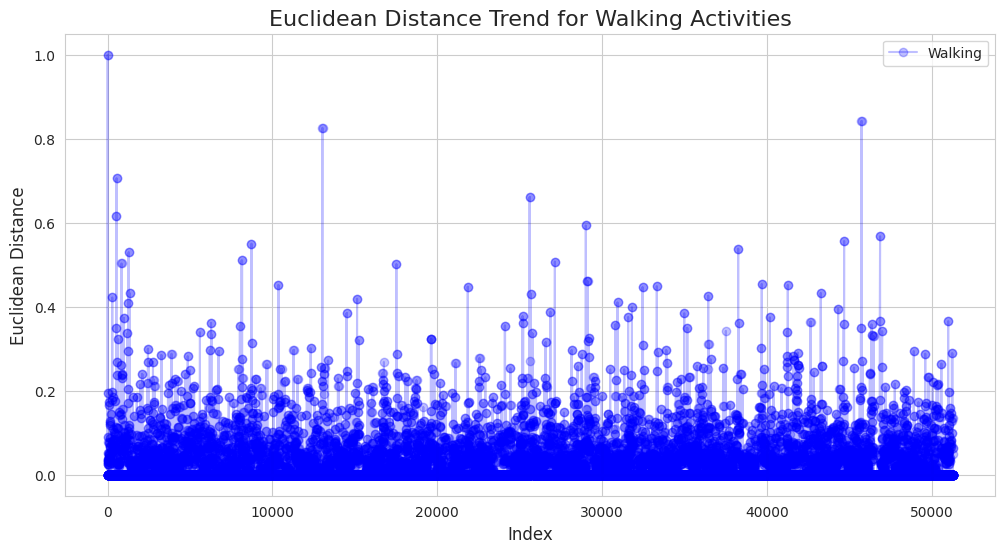

In [46]:
# Create a plot
plt.figure(figsize=(12, 6))
# Plot the Euclidean Distance trend for Walking activity
plt.plot(out_walking_data['Euclidean Distance'], label='Walking', linestyle='-', marker='o', color='blue', alpha=0.25)

# Customize the chart
plt.title('Euclidean Distance Trend for Walking Activities', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Euclidean Distance', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# Show the plot
plt.show()

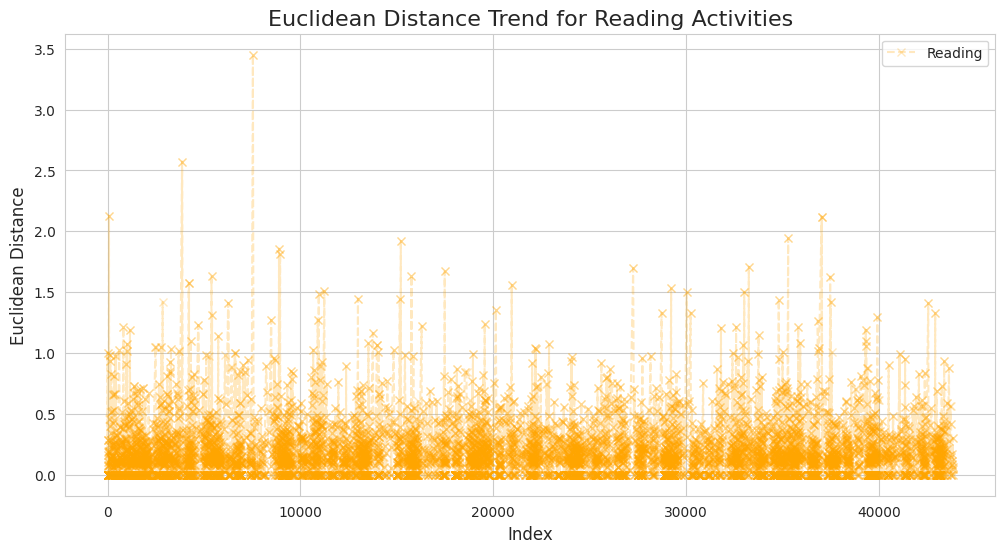

In [44]:
# Create a plot
plt.figure(figsize=(12, 6))
# Plot the Euclidean Distance trend for Reading activity
plt.plot(out_reading_data['Euclidean Distance'], label='Reading', linestyle='--', marker='x', color='orange', alpha=0.25)

# Customize the chart
plt.title('Euclidean Distance Trend for Reading Activities', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Euclidean Distance', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# Show the plot
plt.show()

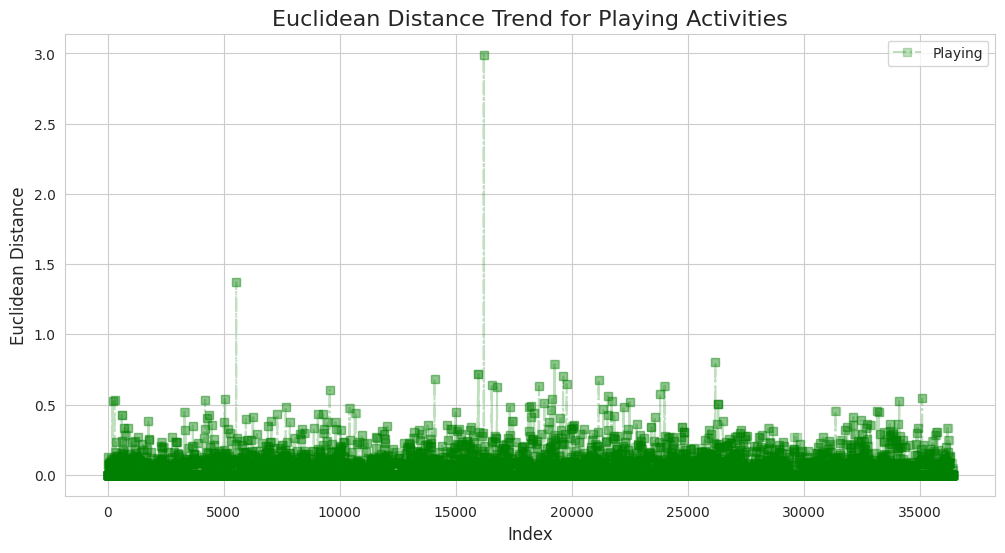

In [45]:
plt.show()
# Create a plot
plt.figure(figsize=(12, 6))
# Plot the Euclidean Distance trend for Playing activity
plt.plot(out_playing_data['Euclidean Distance'], label='Playing', linestyle='-.', marker='s', color='green', alpha=0.25)

# Customize the chart
plt.title('Euclidean Distance Trend for Playing Activities', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Euclidean Distance', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# Show the plot
plt.show()

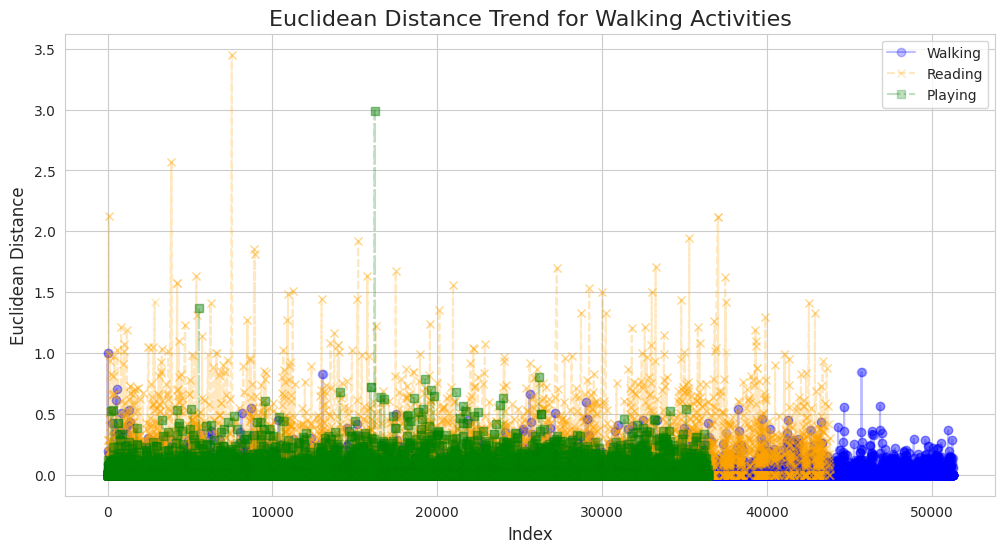

In [48]:
# Create a plot
plt.figure(figsize=(12, 6))
# Plot the Euclidean Distance trend for each activity
plt.plot(out_walking_data['Euclidean Distance'], label='Walking', linestyle='-', marker='o', color='blue', alpha=0.25)
plt.plot(out_reading_data['Euclidean Distance'], label='Reading', linestyle='--', marker='x', color='orange', alpha=0.25)
plt.plot(out_playing_data['Euclidean Distance'], label='Playing', linestyle='-.', marker='s', color='green', alpha=0.25)


# Customize the chart
plt.title('Euclidean Distance Trend for Walking Activities', fontsize=16)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Euclidean Distance', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True)

# Show the plot
plt.show()